<a href="https://colab.research.google.com/github/Sanjidh090/ML-Algorithms-From-Scratch/blob/main/Gradient%20Descent/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent
- This notebook contains the code to implement the following variants of the Gradient Descent Algorithms from scratch:
 - Batch Gradient Descent
 - Mini-batch Gradient Descent
 - Stochastic Gradient Descent
- The aim of this notebook is to perform a comparitive study about the aforementioned algorithms using visualizations

## Importing Libraries

In [1]:
# data manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt

# dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

## Custom Class

In [2]:
class StandardScaler:

  def __init__(self):
    pass


  def fit(self, X, y=None):
    self.means_ = np.mean(X, axis=0)
    self.std_ = np.std(X, axis=0)
    return self


  def transform(self, X):
    return (X - self.means_) / self.std_


  def inverse_transform(self, X):
    return (X * self.std_) + self.means_

In [3]:
class BatchGD:

  def __init__(self,
               eta=1.0,
               eta_d=50,
               n_epochs=100,
               random_state=None):
    """
    Parameters:
    -----------

    eta: float
         Learning rate for gradient descent

    eta_d: int
           Used in learning schedule for updating the learning rate for gradient descent

    n_epochs: int
              The no. of times to iterate over the entire dataset for gradient descent

    random_state: int
                  For controlling the randomness and reproducibility of results across multiple runs
    """
    self.eta = eta
    self.eta_d = eta_d
    self.n_epochs = n_epochs
    self.random_state = random_state


  def _learning_schedule(self, i):
    return self.eta / (self.eta_d + i)


  def fit(self, X, y):
    if self.random_state:
      np.random.seed(self.random_state)

    n, p = X.shape
    self.b_ = np.random.rand()
    self.w_ = np.random.rand(p)
    self.thetas_ = []

    for i in range(self.n_epochs):
      y_hat = np.dot(X, self.w_) + self.b_
      errors = y - y_hat

      # computing the gradients
      dJ_dw = (-1 / n) * np.dot(X.T, errors)
      dJ_db = -errors.mean()

      # updating the weights
      alpha = self._learning_schedule(i + 1)
      self.w_ -= (alpha * dJ_dw)
      self.b_ -= (alpha * dJ_db)

      self.thetas_.append([self.b_, self.w_[0]])

    return self

In [4]:
class StochasticGD:

  def __init__(self,
               eta=1.0,
               eta_d=50,
               n_iter=100,
               random_state=None):
    """
    Parameters:
    -----------

    eta: float
         Learning rate for gradient descent

    eta_d: int
           Used in learning schedule for updating the learning rate for gradient descent

    n_iter: int
            The total no. of iterations to run the gradient descent algorithm

    random_state: int
                  For controlling the randomness and reproducibility of results across multiple runs
    """
    self.eta = eta
    self.eta_d = eta_d
    self.n_iter = n_iter
    self.random_state = random_state


  def _learning_schedule(self, i):
    return self.eta / (self.eta_d + i)


  def fit(self, X, y):
    if self.random_state:
      np.random.seed(self.random_state)

    n, p = X.shape
    self.b_ = np.random.rand()
    self.w_ = np.random.rand(p)
    self.thetas_ = []

    for i in range(self.n_iter):
      # selecting an observation at random
      ix = np.random.randint(n)
      X_sgd = X[ix]
      y_sgd = y[ix]

      y_hat = np.dot(X_sgd, self.w_) + self.b_
      error = y_sgd - y_hat

      # computing the gradients
      dJ_dw = -(error * X_sgd)
      dJ_db = -error

      # updating the weights
      alpha = self._learning_schedule(i + 1)
      self.w_ -= (alpha * dJ_dw)
      self.b_ -= (alpha * dJ_db)

      self.thetas_.append([self.b_, self.w_[0]])

    return self

In [5]:
class MiniBatchGD:

  def __init__(self,
               k=10,
               eta=1.0,
               eta_d=50,
               n_iter=50,
               random_state=None):
    """
    Parameters:
    -----------

    k: int
       Size of each batch

    eta: float
         Learning rate for gradient descent

    eta_d: int
           Used in learning schedule for updating the learning rate for gradient descent

    n_iter: int
            The total no. of iterations to run the gradient descent algorithm

    random_state: int
                  For controlling the randomness and reproducibility of results across multiple runs
    """
    self.k = k
    self.eta = eta
    self.eta_d = eta_d
    self.n_iter = n_iter
    self.random_state = random_state


  def _learning_schedule(self, i):
    return self.eta / (self.eta_d + i)


  def fit(self, X, y):
    if self.random_state:
      np.random.seed(self.random_state)

    n, p = X.shape
    self.b_ = np.random.rand()
    self.w_ = np.random.rand(p)
    self.thetas_ = []

    for i in range(self.n_iter):
      # generating the batch
      random_indices = np.random.choice(n,
                                        size=self.k,
                                        replace=False)
      X_batch = X[random_indices]
      y_batch = y[random_indices]

      y_hat = np.dot(X_batch, self.w_) + self.b_
      errors = y_batch - y_hat

      # computing the gradients
      dJ_dw = (-1 / self.k) * np.dot(X_batch.T, errors)
      dJ_db = -errors.mean()

      # updating the weights
      alpha = self._learning_schedule(i + 1)
      self.w_ -= (alpha * dJ_dw)
      self.b_ -= (alpha * dJ_db)

      self.thetas_.append([self.b_, self.w_[0]])

    return self

## Getting the Data

In [6]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, [0]].values,
                                                    y.values,
                                                    test_size=0.2,
                                                    random_state=7)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16512, 1) (16512,)
(4128, 1) (4128,)


- We're using a single feature for convenient visualization of results

## Scaling the Data

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)

In [8]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Batch G.D.

In [9]:
batch_gd = BatchGD(n_epochs=100)
batch_gd.fit(X_train_scaled, y_train)

In [10]:
batch_gd.w_

array([0.58162604])

In [11]:
batch_gd.b_

np.float64(1.4043160267865664)

In [13]:
bgd_path = np.array(batch_gd.thetas_)

### Stochastic G.D.

In [14]:
stochastic_gd = StochasticGD(n_iter=100)
stochastic_gd.fit(X_train_scaled, y_train)

In [15]:
stochastic_gd.w_

array([0.76395061])

In [16]:
stochastic_gd.b_

np.float64(1.5555084691466923)

In [17]:
sgd_path = np.array(stochastic_gd.thetas_)

### Mini-batch G.D.

In [18]:
minibatch_gd = MiniBatchGD(k=50, n_iter=100)
minibatch_gd.fit(X_train_scaled, y_train)

In [19]:
minibatch_gd.w_

array([0.67751187])

In [20]:
minibatch_gd.b_

np.float64(1.6463404381379776)

In [21]:
mbgd_path = np.array(minibatch_gd.thetas_)

## Analyzing Results

In [22]:
def plot_path(thetas):
  plt.plot(thetas[:, 0],
           thetas[:, 1],
           marker="s",
           color="lightgreen")

  plt.scatter(thetas[0, 0],
              thetas[0, 1],
              s=100,
              color="black",
              marker="o",
              label="Start",
              zorder=2)

  plt.scatter(thetas[-1, 0],
              thetas[-1, 1],
              s=100,
              color="red",
              marker="o",
              label="End",
              zorder=2)

  plt.xlabel("$w_1$")
  plt.ylabel("$w_2$", rotation=0, labelpad=15)
  plt.grid(True)

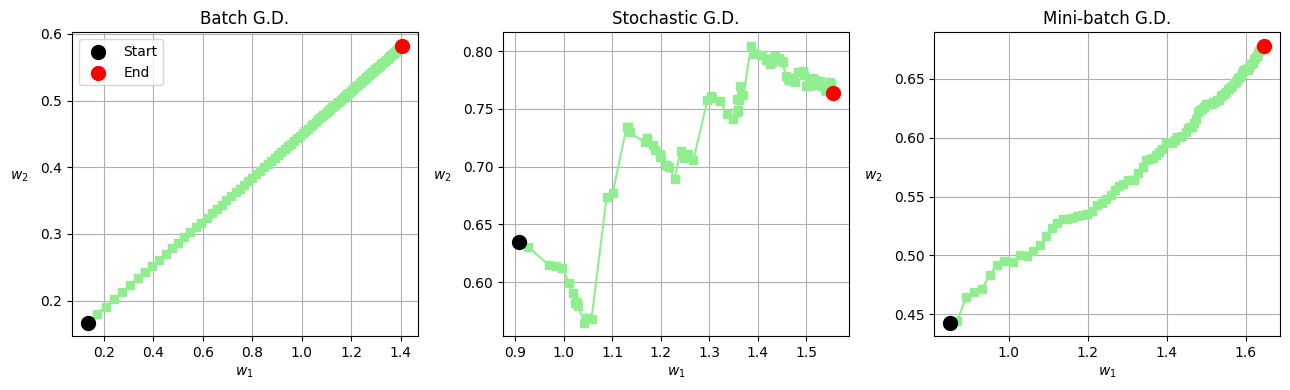

In [23]:
plt.figure(figsize=(13, 4))

plt.subplot(1, 3, 1)
plot_path(bgd_path)
plt.title("Batch G.D.")
plt.legend(loc="upper left")

plt.subplot(1, 3, 2)
plot_path(sgd_path)
plt.title("Stochastic G.D.")

plt.subplot(1, 3, 3)
plot_path(mbgd_path)
plt.title("Mini-batch G.D.")

plt.tight_layout()
plt.show()

In [24]:
(pd
 .DataFrame({"w": [batch_gd.w_[0], stochastic_gd.w_[0], minibatch_gd.w_[0]],
             "b": [batch_gd.b_, stochastic_gd.b_, minibatch_gd.b_]},
            index=["Batch", "Stochastic", "Mini-batch"])
 .style
 .format("{:.3f}"))

,w,b
Batch,0.582,1.404
Stochastic,0.764,1.556
Mini-batch,0.678,1.646


## Final Remarks

- Through visualizations, it's quite clear that:
 - The path of Batch G.D. is very smooth, because it utilizes the entire dataset in each iteration
 - The path of Stochastic G.D. is very irregular and rightly so; as it uses a single observation in each iteration selected randomly
 - The path of Mini-batch G.D. is smoother than that of Stochastic G.D. but not as much as that of Batch G.D.

- The model coefficients are displayed in a Pandas Dataframe for all the 3 models
 - The results are almost similar
 - The results can be further analyzed upon varying the hyperparameters of the algorithms